# Striatal dopamine dynamics - Fig. 1, Large-scale 3D model of the dorsal striatum

Written by Aske Lykke Ejdrup<br>
Last updated: 2023/08/17

Code for the model presented in the manuscript:<br>
**Striatal dopamine dynamics and the regulation by the dopamine transporter** (unpublished)<br>
<font size = "2">By Aske L. Ejdrup<sup>1</sup>, Jakob K. Dreyer<sup>2</sup>, Matthew D. Lycas<sup>1</sup>, Søren H. Jørgensen<sup>1</sup>, Trevor W. Robbins<sup>3,4</sup>, Jeffrey W. Dalley<sup>3,4,5</sup>, Freja Herborg<sup>1</sup> and Ulrik Gether<sup>1</sup></font>

<br>


<font size = "2">
<sup>1</sup>Department of Neuroscience, Faculty of Health and Medical Sciences, Maersk Tower 7.5,
University of Copenhagen, Copenhagen, Denmark<br>
<sup>2</sup>Department of Bioinformatics, H Lundbeck A/S, Valby, Denmark<br>
<sup>3</sup>Behavioural and Clinical Neuroscience Institute, University of Cambridge, Cambridge CB2 3EB, UK<br>
<sup>4</sup>Department of Psychology, University of Cambridge, Cambridge CB2 3EB, UK<br>
<sup>5</sup>Department of Psychiatry, University of Cambridge, Cambridge CB2 0SZ, UK<br>
</font>

<font color="grey">Size of simulation space is defined as an input parameter in *sim.sim_space_neurons_3D*. If the code takes too long to run, consider reducing the size.</font>

#### Import functions

In [1]:
import sim_functions as sim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.gridspec import GridSpec

### Run simulation for Figure 1A and F-H

In [30]:
# Simulate release sites and firing pattern
simulation, space_ph, firing, release_sites, var_list = \
        sim.sim_space_neurons_3D(width = 100, depth = 100, dx_dy = 1, time = 2, D = 763,
                  inter_var_distance = 25, p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = 0.001)

# Simulate temporal dopamine dynamics 
full_sim, occ_D1, occ_D2 = sim.sim_dynamics_3D(simulation, space_ph, release_sites, firing, var_list, 
                  Q = 3000, uptake_rate = 4.5*10**-6, Ds = 321.7237308146399)

100%|███████████████████████████████████████| 6103/6103 [18:27<00:00,  5.51it/s]


### Figure 1A, release sites

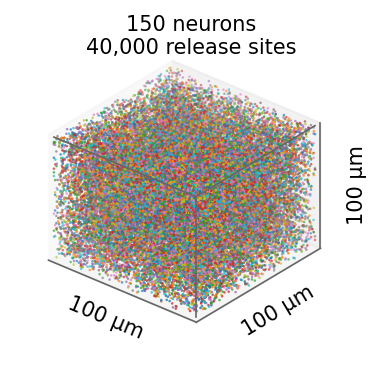

In [21]:
# Define dimensions
Nx, Ny, Nz = 100, 100, 100
X, Y, Z = np.meshgrid(np.arange(Nx), np.arange(Ny), -np.arange(Nz))

# Create a figure with 3D axes
fig = plt.figure(figsize=(2.5, 2.5), dpi = 150)
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_proj_type('ortho')

fig.text(0.53, 0.88, "150 neurons\n40,000 release sites", fontsize = 10, ha = "center")

color_cycle = np.tile(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                       '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'],
                      4000)
ax1.scatter(release_sites[0,:], release_sites[1,:], -release_sites[2,:], s = 1.5, lw = 0,
            color = color_cycle)

# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax1.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=0.8, zorder=1e3)
ax1.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax1.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax1.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

ax1.w_xaxis.line.set_color([0.4,0.4,0.4])
ax1.w_yaxis.line.set_color([0.4,0.4,0.4])
ax1.w_zaxis.line.set_color([0.4,0.4,0.4])

# Set labels and zticks
ax1.set_zlim(-99,0)
ax1.set_zlabel('100 \u00B5m', labelpad = -10)
ax1.set_zticks([])
ax1.set_xlim(0,99)
ax1.set_xlabel('100 \u00B5m', labelpad = -10)
ax1.set_xticks([])
ax1.set_xlim(0,99)
ax1.set_ylabel('100 \u00B5m', labelpad = -10)
ax1.set_yticks([])

# Set distance and angle view
ax1.view_init(30, -50)
ax1.dist = 11

fig.tight_layout()

### Figure 1D, steady state image of DS

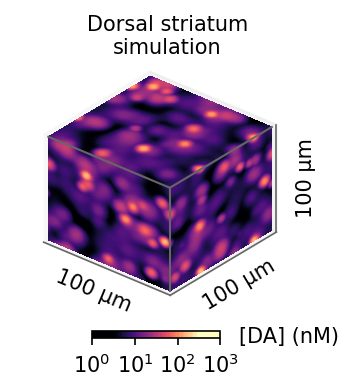

In [29]:
# Define dimensions
Nx, Ny, Nz = 100, 100, 100
X, Y, Z = np.meshgrid(np.arange(Nx), np.arange(Ny), -np.arange(Nz))

# Create a figure with 3D ax
fig = plt.figure(figsize=(2.5, 2.5), dpi = 150)
ax2 = fig.add_subplot(111, projection='3d')
ax2.set_proj_type('ortho')

# Grab a random timepoint to visualize a steady state image
data = np.log10(full_sim[500,:,:,:])

fig.text(0.53, 0.92, "Dorsal striatum\nsimulation", fontsize = 10, ha = "center")

cmap = "magma"

kw = {
    'vmin': -8.5,
    'vmax': -6.5,
    'levels': np.linspace(-9, -6, 100),
}
# Plot contour surfaces
for i in range(3):
    _ = ax2.contourf(
        X[:, :, 0], Y[:, :, 0], data[:, :, 0],
        zdir='z', offset=0, **kw, cmap = cmap
    )

    _ = ax2.contourf(
        X[0, :, :], data[0, :, :], Z[0, :, :],
        zdir='y', offset=0, **kw, cmap = cmap
    )
    C = ax2.contourf(
        data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
        zdir='x', offset=X.max(), **kw, cmap = cmap
    )
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax2.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax2.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax2.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax2.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax2.set_zlim(-99,0)
ax2.set_zlabel('100 \u00B5m', labelpad = -12)
ax2.set_zticks([])
ax2.set_xlim(0,99)
ax2.set_xlabel('100 \u00B5m', labelpad = -12)
ax2.set_xticks([])
ax2.set_xlim(0,99)
ax2.set_ylabel('100 \u00B5m', labelpad = -12)
ax2.set_yticks([])

ax2.w_xaxis.line.set_color([0.4,0.4,0.4])
ax2.w_yaxis.line.set_color([0.4,0.4,0.4])
ax2.w_zaxis.line.set_color([0.4,0.4,0.4])

# Set distance and angle view
ax2.view_init(30, -50)
ax2.dist = 11


fig.text(0.72, 0.15, "[DA] (nM)")

# Colorbar
cbar = fig.colorbar(C, ax=ax2, fraction=0.022, pad=0.01, ticks = [-6, -7, -8, -9], orientation="horizontal")
cbar.ax.set_xticklabels(['$10^{3}$', '$10^{2}$', '$10^{1}$','$10^{0}$'])
cbar.ax.invert_xaxis()

fig.tight_layout()

### Figure 1 E & F, temporal cross-section and [DA] distribution 

#### Aggregate the data for the histograms

In [32]:
# (takes a little while)
hist_DS, _ = np.histogram(np.log10(full_sim[1000:,:,:,:]).flatten(), bins = np.log10(np.logspace(-10,-5,1000)), density = True)

#### Plot the cross section and [DA] distribution

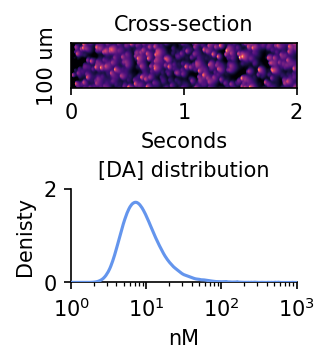

In [49]:
x_range = np.logspace(-10,-5,999)

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (2.3,2.5), dpi = 150)

time_points = []
for i in range(3):
    time_points.append(np.argmin(abs(np.linspace(0,2,len(full_sim))-i)))

# Cross section
ax1.set_title("Cross-section", fontsize = 10, color = "k")
ax1.set_ylabel("100 um", labelpad = 7)
ax1.set_xlabel("Seconds")
ax1.set_yticks([])
ax1.set_xticks(time_points)
ax1.set_xticklabels([0,1,2])
ax1.set_xlim(time_points[0],time_points[-1])
# Add 0.01 nM everywhere to avoid zeros
im = ax1.imshow(np.log10(full_sim[:,25,:,25].T+10**-11), aspect = 4, vmin = -8.5, vmax = -6.5, cmap = "magma")

# [DA] distribution
ax2.set_title("[DA] distribution", fontsize = 10)
ax2.plot(x_range, hist_DS, color = "cornflowerblue", lw = 1.5, zorder = 10)
ax2.set_ylabel("Denisty")
ax2.set_xlabel("nM")
ax2.set_xscale("log")
ax2.set_xlim(10**-9, 10**-6)
ax2.set_xticks([10**-9, 10**-8,10**-7, 10**-6])
ax2.set_xticklabels(['$10^{0}$', '$10^{1}$', '$10^{2}$','$10^{3}$'])
ax2.set_ylim(0,2)
ax2.set_yticks([0,2])
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

fig.tight_layout()

### Figure 1G

#### Simulate the bursting scenarios

In [53]:
# Set parameters for the simulation and pregenerate space to store output from all three bursting scenarios
sim_width = 100
time = 1.5
freq = 0.02
burst_scenarios = np.zeros((3,int(time/freq),sim_width,sim_width,sim_width))

APs = [3, 6, 12]
HZs = [10, 20, 40]

# Run through all three bursting scenarios
for i in range(burst_scenarios.shape[0]):
    
    # # Simulate release sites and firing pattern
    simulation, space_ph, firing, release_sites, var_list = \
            sim.sim_space_neurons_3D(width = 100, depth = 100, dx_dy = 1, time = time, D = 763,
                      inter_var_distance = 25, p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = freq)
            
    # Define the area
    r_sphere = 5
    ROI = (release_sites[0,:] > (sim_width/2 - r_sphere - 0.5)) & (release_sites[0,:] < (sim_width/2 + r_sphere - 0.5)) & \
          (release_sites[1,:] > (sim_width/2 - r_sphere - 0.5)) & (release_sites[1,:] < (sim_width/2 + r_sphere - 0.5))
          
    # Define the burst
    start_time = 0.5 # In seconds
    start_time_dt = int(start_time/var_list[1]) # convert to index
    
    n_ap = APs[i] # Number of action potentials in a burst
    burst_rate = HZs[i] # Burst firing rate (Hz)
    burst_p_r = 1 # Release probability per AP during bursts
    
    
    burst_time = int(1/var_list[1]*(n_ap/burst_rate)) # Length of the burst
    AP_freq = n_ap/burst_time # APs per d_t
    
    
    # Generate the burst of firing
    firing[start_time_dt:start_time_dt+burst_time,ROI] =\
        np.random.poisson(AP_freq * burst_p_r, (burst_time, np.sum(ROI)))
    
            
    # Simulate the dynamics
    burst_scenarios[i,:,:,:,:], _, _ = sim.sim_dynamics_3D(simulation, space_ph, release_sites, firing, var_list, 
                      Q = 3000, uptake_rate = 6*10**-6, Ds = 321.7237308146399)

100%|███████████████████████████████████████| 4577/4577 [01:00<00:00, 75.04it/s]


#### Plot the burst overflow

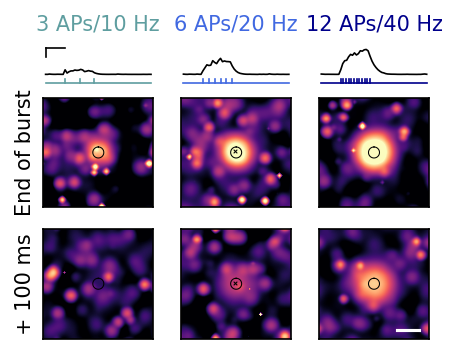

In [55]:
fig, axes = plt.subplots(3,3, figsize = (3.1,2.5), dpi = 150, gridspec_kw={"height_ratios":[0.3,1,1]})

axes[0,0].set_title("3 APs/10 Hz", fontsize = 10, color = "cadetblue")
axes[0,1].set_title("6 APs/20 Hz", fontsize = 10, color = "royalblue")
axes[0,2].set_title("12 APs/40 Hz", fontsize = 10, color = "darkblue")
axes[1,0].set_ylabel("End of burst")
axes[2,0].set_ylabel("+ 100 ms")

axes[0,0].plot(np.mean(burst_scenarios[0,15:70,45:55,45:55,50], axis = (1,2))*10**9, lw = 0.8, color = "k")
axes[0,1].plot(np.mean(burst_scenarios[1,15:70,45:55,45:55,50], axis = (1,2))*10**9, lw = 0.8, color = "k")
axes[0,2].plot(np.mean(burst_scenarios[2,15:70,45:55,45:55,50], axis = (1,2))*10**9, lw = 0.8, color = "k")

color_list = ["cadetblue", "royalblue", "darkblue"]
no_bursts = [3,6,12]

for i in range(3):
    axes[0,i].plot([0,54],[-500,-500], lw = 0.8, clip_on = False, color = color_list[i])
    bursts =  np.linspace(10,25,no_bursts[i])
    for j in range(len(bursts)):
        axes[0,i].plot([bursts[j],bursts[j]], [-470,-250], lw = 0.8, color = color_list[i], clip_on = False)

for i in range(3):
    axes.flatten()[i].set_ylim(-100,1800)
    axes.flatten()[i].spines["top"].set_visible(False)
    axes.flatten()[i].spines["right"].set_visible(False)
    axes.flatten()[i].spines["left"].set_visible(False)
    axes.flatten()[i].spines["bottom"].set_visible(False)

axes[0,0].plot([0,0], [1000,1500], lw = 0.8, color = "k")
axes[0,0].plot([0,10], [1500,1500], lw = 0.8, color = "k")

axes[1,0].imshow(np.log10(burst_scenarios[0,39,:,:,50]), vmin = -8.5, vmax = -6.5, cmap = "magma")
axes[2,0].imshow(np.log10(burst_scenarios[0,45,:,:,50]), vmin = -8.5, vmax = -6.5, cmap = "magma")

axes[1,1].imshow(np.log10(burst_scenarios[1,39,:,:,50]), vmin = -8.5, vmax = -6.5, cmap = "magma")
axes[1,1].scatter(48.5,48.5, color = "k", marker = "x", s = 3, lw = 0.5)
axes[2,1].imshow(np.log10(burst_scenarios[1,45,:,:,50]), vmin = -8.5, vmax = -6.5, cmap = "magma")
axes[2,1].scatter(48.5,48.5, color = "k", marker = "x", s = 3, lw = 0.5)

axes[1,2].imshow(np.log10(burst_scenarios[2,39,:,:,50]), vmin = -8.5, vmax = -6.5, cmap = "magma")
axes[2,2].imshow(np.log10(burst_scenarios[2,45,:,:,50]), vmin = -8.5, vmax = -6.5, cmap = "magma")

for i in range(9):
    if i > 2:
        axes.flatten()[i].plot(np.sin(np.linspace(-np.pi,np.pi,100))*5+49.5,
                               np.cos(np.linspace(-np.pi,np.pi,100))*5+49.5,
                               color = "k", lw = .5, ls = "-", zorder = 10)
    axes.flatten()[i].set_xticks([])
    axes.flatten()[i].set_yticks([])
    
axes[2,2].plot([70,90],[92,92], lw = 1.5, color = "w", zorder = 10)

fig.tight_layout(h_pad = 0.8, w_pad = 0.7)

### Figure 1I, receptor occupation

#### Simulate receptor occupancy after a burst

In [19]:
# DS
# Simulate release sites
simulation, space_ph, firing, release_sites, var_list = \
        sim.sim_space_neurons_3D(width = 50, depth = 50, dx_dy = 1, time = 17, D = 763,
                  inter_var_distance = 25, p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = 0.002)

# Define the area

width = 50
r_sphere = 5
      
# Define the burst
start_time = 7 # In seconds
start_time_dt = int(start_time/var_list[1]) # convert to index

n_ap = 6 # Number of action potentials in a burst
burst_rate = 20 # Burst firing rate (Hz)
burst_p_r = 1 # Release probability per AP during bursts


burst_time = int(1/var_list[1]*(n_ap/burst_rate)) # Length of the burst
AP_freq = n_ap/burst_time # APs per d_t

# Find relevant terminals
ROI = (release_sites[0,:] > (width/2 - r_sphere - 0.5)) & (release_sites[0,:] < (width/2 + r_sphere - 0.5)) & \
      (release_sites[1,:] > (width/2 - r_sphere - 0.5)) & (release_sites[1,:] < (width/2 + r_sphere - 0.5))
      
# Add the burst of firing
firing[start_time_dt:start_time_dt+burst_time,ROI] =\
    np.random.poisson(AP_freq * burst_p_r, (burst_time, np.sum(ROI)))
     
full_sim_DS_burst, occ_D1_DS_burst, occ_D2_DS_burst = sim.b(simulation, space_ph, release_sites, firing, var_list, 
                  Q = 3000, uptake_rate = 6*10**-6, Ds = 321.7237308146399, start_occ_D2 = 0.4)

100%|████████████████████████████████████| 51883/51883 [01:32<00:00, 561.38it/s]


#### Plot receptor occupancy

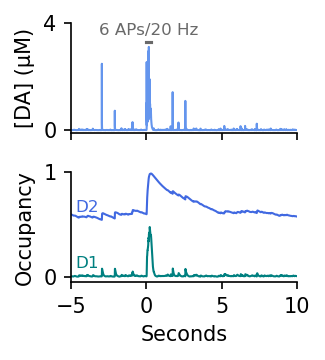

In [21]:
# Plot the receptor occupancy after burst
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (2.4,2.5), dpi = 150)
time_y = np.linspace(-5, 10, 7500)

# Select a random release site
site_no = 1
x_site = release_sites[0,np.where(ROI==True)[0][site_no]]
y_site = release_sites[1,np.where(ROI==True)[0][site_no]]
z_site = release_sites[2,np.where(ROI==True)[0][site_no]]


# Concentration profile
# ax1.set_title("Receptor binding", fontsize = 10)
ax1.plot(time_y, full_sim_DS_burst[1000:,x_site,y_site,z_site+1]*10**6, lw = 1, color = "cornflowerblue")

# The burst
ax1.plot([0,0.3],[3.3,3.3], color = "dimgrey")
ax1.text(0.15, 3.55, "6 APs/20 Hz", ha = "center", fontsize = 8, color = "dimgrey")

ax1.set_ylim(-0.1,2)
ax1.set_yticks([0,4])
ax1.set_xlim(-5,10)
ax1.set_xticklabels([])
ax1.set_ylabel("[DA] (\u00B5M)")


# Receptor occupany
ax2.plot(time_y, occ_D1_DS_burst[1000:,x_site,y_site,z_site+1], lw = 1, color = "teal", ls = "-")
ax2.text(-4.7,0.08, "D1", ha = "left", fontsize = 8, color = "teal")

ax2.plot(time_y, occ_D2_DS_burst[1000:,x_site,y_site,z_site+1], lw = 1, color = "royalblue", ls = "-")
ax2.text(-4.7,0.62, "D2", ha = "left", fontsize = 8, color = "royalblue")


ax2.set_ylim(-0.05,1)
ax2.set_xlim(-5,10)
ax2.set_ylabel("Occupancy")
ax2.set_xlabel("Seconds")


ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

fig.tight_layout()

### Figure 1J, pause in firing

#### Simulate receptor occupancy after a 1-second pause

In [4]:
# Simulate release sites
simulation, space_ph, firing, release_sites, var_list = \
        sim.sim_space_neurons_3D(width = 50, depth = 50, dx_dy = 1, time = 17, D = 763,
                  inter_var_distance = 25, p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = 0.002)

# Define the pause
start_time = 7 # In seconds
start_time_dt = int(start_time/var_list[1]) # convert to index
pause_time = int(1/var_list[1]) # Length of the burst

# Add the pause in firing
firing[start_time_dt:start_time_dt+pause_time,:] = 0

# Simulate the resulting dynamics    
full_sim_DS_pause, occ_D1_DS_pause, occ_D2_DS_pause = sim.sim_dynamics_3D(simulation, space_ph, release_sites, firing, var_list, 
                  Q = 3000, uptake_rate = 6*10**-6, Ds = 321.7237308146399, start_occ_D2 = 0.55)

# Calculate mean of concentration and occupancies (omit the first 2 seconds to let it reach steady state)
conc_pause = np.mean(full_sim_DS_pause[1000:,:,:,:], axis = (1,2,3))*10**9
D1_pause = np.mean(occ_D1_DS_pause[1000:,:,:,:], axis = (1,2,3))
D2_pause = np.mean(occ_D2_DS_pause[1000:,:,:,:], axis = (1,2,3))

100%|████████████████████████████████████| 51883/51883 [01:31<00:00, 569.05it/s]


#### Plot occupancy after pause

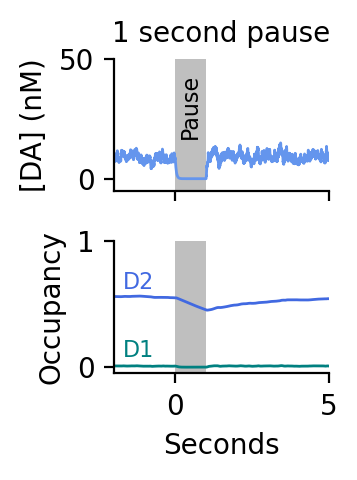

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (2,2.5), dpi = 200)
ax1.set_title("1 second pause", fontsize = 10)
time_y = np.linspace(-5, 10, 7500)

# Concentration profile
# ax1.set_title("Receptor binding", fontsize = 10)
ax1.plot(time_y, conc_pause, lw = 1, color = "cornflowerblue")

# The pause
ax1.fill_between([0,1],[50,50], [-5, -5], color = "grey", alpha = 0.5, lw = 0)
ax1.text(0.5,30, "Pause", ha = "center", va = "center", rotation = 90, fontsize = 8, color = "k")

ax1.set_ylim(-5,50)
# ax1.set_yticks([0,4])
ax1.set_xlim(-2,5)
ax1.set_xticklabels([])
ax1.set_ylabel("[DA] (nM)")


# Receptor occupany
ax2.plot(time_y, D1_pause, lw = 1, color = "teal", ls = "-")
ax2.text(-1.7,0.08, "D1", ha = "left", fontsize = 8, color = "teal")

ax2.plot(time_y, D2_pause, lw = 1, color = "royalblue", ls = "-")
ax2.text(-1.7,0.62, "D2", ha = "left", fontsize = 8, color = "royalblue")

# The pause
ax2.fill_between([0,1],[50,50], [-5, -5], color = "grey", alpha = 0.5, lw = 0)

ax2.set_ylim(-0.05,1)
ax2.set_xlim(-2,5)
ax2.set_ylabel("Occupancy")
ax2.set_xlabel("Seconds")


ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
# ax1.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

fig.tight_layout()

### Figure 1B and C

#### Simulate diffusion from a single point source

In [9]:
# Function for sing 3D diffusion example
def diffuse_3D_range(ms, space0, vmax):
    for i in tqdm(range(int(time/dt)-1)):
        
        _, space0[i+1,:,:,:] = sim.do_timestep_3D(space0[i,:,:,:], 
                                      vmax, Ds, dt, dx_dy, 1)
    return space0

# Parameters
time = 0.1 # in sec
# field size, um
w = h = depth = 20
# intervals in x-, y- directions, um
dx = dy = dz = 0.25
dx_dy = dx
# Diffusivity of DA in striatum, um2.s-1
D = 763
gamma = 1.54
Ds = D/(gamma**2)

nx, ny, nz = int(w/dx), int(h/dy), int(depth/dz),

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

space0 = np.zeros((int(time/dt), nx, ny, nz))

# Q of 3000 to a concentration in dx**3 volume
Q = 3000
area = (dx*10**-6)**3 # in m^3
area_L = area*1000 # in liters
Na = 6.022*10**23 # Avrogadros number
start_conc = Q/Na/area_L*10**9 # start conc of single voxel in nM

# set middle voxel to start_conc and correct for ECF
space0[0, int(w/2/dx),int(h/2/dy), int(depth/2/dz)] = start_conc*(1/0.21) 

# Q of 3000 to a concentration in a single point
U = (4/3*np.pi*(25*10**-3)**3)*1000 # Volume in uL
Cf = 0.025375*10**6 # Fill concentration in uM at Q = 1000 (From Gonon et al., 2000)
Q_factor = 3 # Adjust Q from 1000 to 3000
UCf = U*Cf*Q_factor

# Run the simulation
sim_result = diffuse_3D_range(int(time*1000),space0, 0)

100%|██████████████████████████████████████| 4882/4882 [00:26<00:00, 186.20it/s]


#### Run analytical solution to diffusion from a single point source

In [10]:
# Compute the analytical solution
def point_source_3D(UCf,Ds,t,r,vmax,km):
    C = (UCf/(0.21*(4*Ds*t*np.pi)**(3/2)))*np.exp(-r**2/(4*Ds*t))*np.exp(-(vmax/km)*t)
    return C

# Set parameters
time_points = [0.005, 0.01, 0.02]
radius_range = np.linspace(dx,w/2,int(w/2/dx))
time_range = np.linspace(dt,time,int(time/dt))

# Preallocate space for results
analytical_results = np.zeros((3,40))

for i in range(len(time_points)):
    analytical_results[i,:] = point_source_3D(UCf = UCf, 
                            Ds = D/(gamma**2),
                            t = time_points[i], 
                            r = radius_range,
                            vmax = 0, 
                            km = 0.210)

#### Plot simulated 3D diffusion and concentration profile versus analytical solutions

/var/folders/0n/_54mwd5556db39cht57fqpyh0000gn/T/ipykernel_1992/3138684561.py:82: UserWarning: Use the colorbar set_ticks() method instead.
  cbar_ax.set_yticks([])


Text(0.5, 1.0, '[DA]')

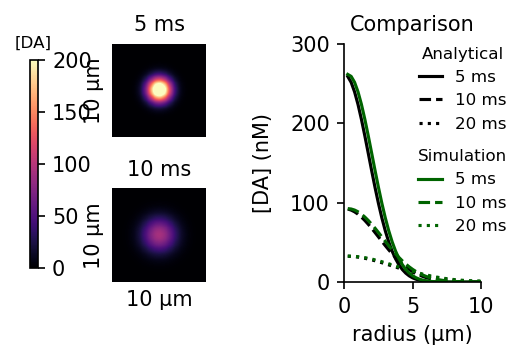

In [18]:
# Plot
fig = plt.figure(figsize = (3.5,2.5), dpi = 150)
gs = GridSpec(2,2, height_ratios=[1,1], width_ratios=[1.5,0.8])

ax11 = fig.add_subplot(gs[0,0])
ax12 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[:,1])


# Visualize the simulation
ax11.set_title("5 ms", fontsize = 10)
im = ax11.imshow(sim_result[int(0.005/dt),:,:,40], vmin = 0, vmax = 200, cmap = "magma")
ax11.set_xlim(0,80)
ax11.set_ylim(0,80)
ax11.set_xticks([])
ax11.set_yticks([])
# ax11.set_xlabel("10 \u00B5m")
ax11.set_ylabel("10 \u00B5m")
ax11.spines["left"].set_visible(False)
ax11.spines["bottom"].set_visible(False)
ax11.spines["right"].set_visible(False)
ax11.spines["top"].set_visible(False)

ax12.set_title("10 ms", fontsize = 10)
ax12.imshow(sim_result[int(0.01/dt),:,:,40], vmin = 0, vmax = 200, cmap = "magma")
ax12.set_xlim(0,80)
ax12.set_ylim(0,80)
ax12.set_xticks([])
ax12.set_yticks([])
ax12.set_xlabel("10 \u00B5m")
ax12.set_ylabel("10 \u00B5m")
ax12.spines["left"].set_visible(False)
ax12.spines["bottom"].set_visible(False)
ax12.spines["right"].set_visible(False)
ax12.spines["top"].set_visible(False)


# Plot comparison
ax2.set_title("Comparison", fontsize = 10)

# Analytical plot
ax2.plot(radius_range,analytical_results[0,:],
          color = "black", ls = "-")
ax2.plot(radius_range,analytical_results[1,:],
         color = "black", ls = "--")
ax2.plot(radius_range,analytical_results[2,:],
          color = "black", ls = ":")

ax2.set_ylabel("[DA] (nM)", labelpad = 8)
ax2.set_ylim(0,300)
# ax2.set_yticks([0,200,400,600,800,1000])

legend1 = plt.legend(("5 ms", "10 ms", "20 ms"), frameon = False,
            loc = "upper right", handlelength = 1.4, bbox_to_anchor = [1.3,1.05], fontsize = 8)
legend1.set_title('Analytical',prop={'size':8})
plt.gca().add_artist(legend1)


# Simulation plot
sim1, = ax2.plot(radius_range,sim_result[int(0.005/dt),40:,40,40],
         color = "darkgreen", ls = "-")
sim2, = ax2.plot(radius_range,sim_result[int(0.01/dt),40:,40,40],
          color = "darkgreen", ls = "--")
sim3, = ax2.plot(radius_range,sim_result[int(0.02/dt),40:,40,40],
          color = "darkgreen", ls = ":")


legend = ax2.legend(handles = [sim1, sim2, sim3], labels = ["5 ms", "10 ms", "20 ms"], frameon = False,
            loc = "upper right", handlelength = 1.4, bbox_to_anchor = [1.3,0.62], fontsize = 8)
legend.set_title('Simulation',prop={'size':8})


ax2.set_xlabel("radius (\u00B5m)")
ax2.set_xlim(0,10)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

fig.tight_layout()

cbar_ax = fig.add_axes([0.04, 0.265, 0.015, 0.555])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_yticks([])
# cbar_ax.set_xlim(0,1)
cbar_ax.set_title('[DA]', fontsize = 8)